<a href="https://colab.research.google.com/github/Likhithluck/Capstone-Project/blob/likhith/Initial_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from datasets import load_dataset
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# Load the dataset
ds = load_dataset("mychen76/invoices-and-receipts_ocr_v1")

# Check dataset structure
print(ds)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/782 [00:00<?, ?B/s]

(…)-00000-of-00001-76ffc8319f74dd65.parquet:   0%|          | 0.00/249M [00:00<?, ?B/s]

(…)-00000-of-00001-af2d92d1cee28514.parquet:   0%|          | 0.00/18.8M [00:00<?, ?B/s]

(…)-00000-of-00001-894b4e1f736b5732.parquet:   0%|          | 0.00/14.1M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/2043 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/125 [00:00<?, ? examples/s]

Generating valid split:   0%|          | 0/70 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['image', 'id', 'parsed_data', 'raw_data'],
        num_rows: 2043
    })
    test: Dataset({
        features: ['image', 'id', 'parsed_data', 'raw_data'],
        num_rows: 125
    })
    valid: Dataset({
        features: ['image', 'id', 'parsed_data', 'raw_data'],
        num_rows: 70
    })
})


In [4]:
def display(image):
    dpi = 80

    # If the input is a file path, load the image
    if isinstance(image, str):
        im_data = plt.imread(image)
    elif isinstance(image, Image.Image):  # If it's a PIL Image
        im_data = np.array(image)  # Convert PIL Image to NumPy array
    else:
        raise ValueError("Input should be a file path or a PIL Image object.")

    height, width  = im_data.shape[:2]

    # What size does the figure need to be in inches to fit the image?
    figsize = width / float(dpi), height / float(dpi)

    # Create a figure of the right size with one axes that takes up the full figure
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])

    # Hide spines, ticks, etc.
    ax.axis('off')

    # Display the image.
    ax.imshow(im_data, cmap='gray')

    plt.show()

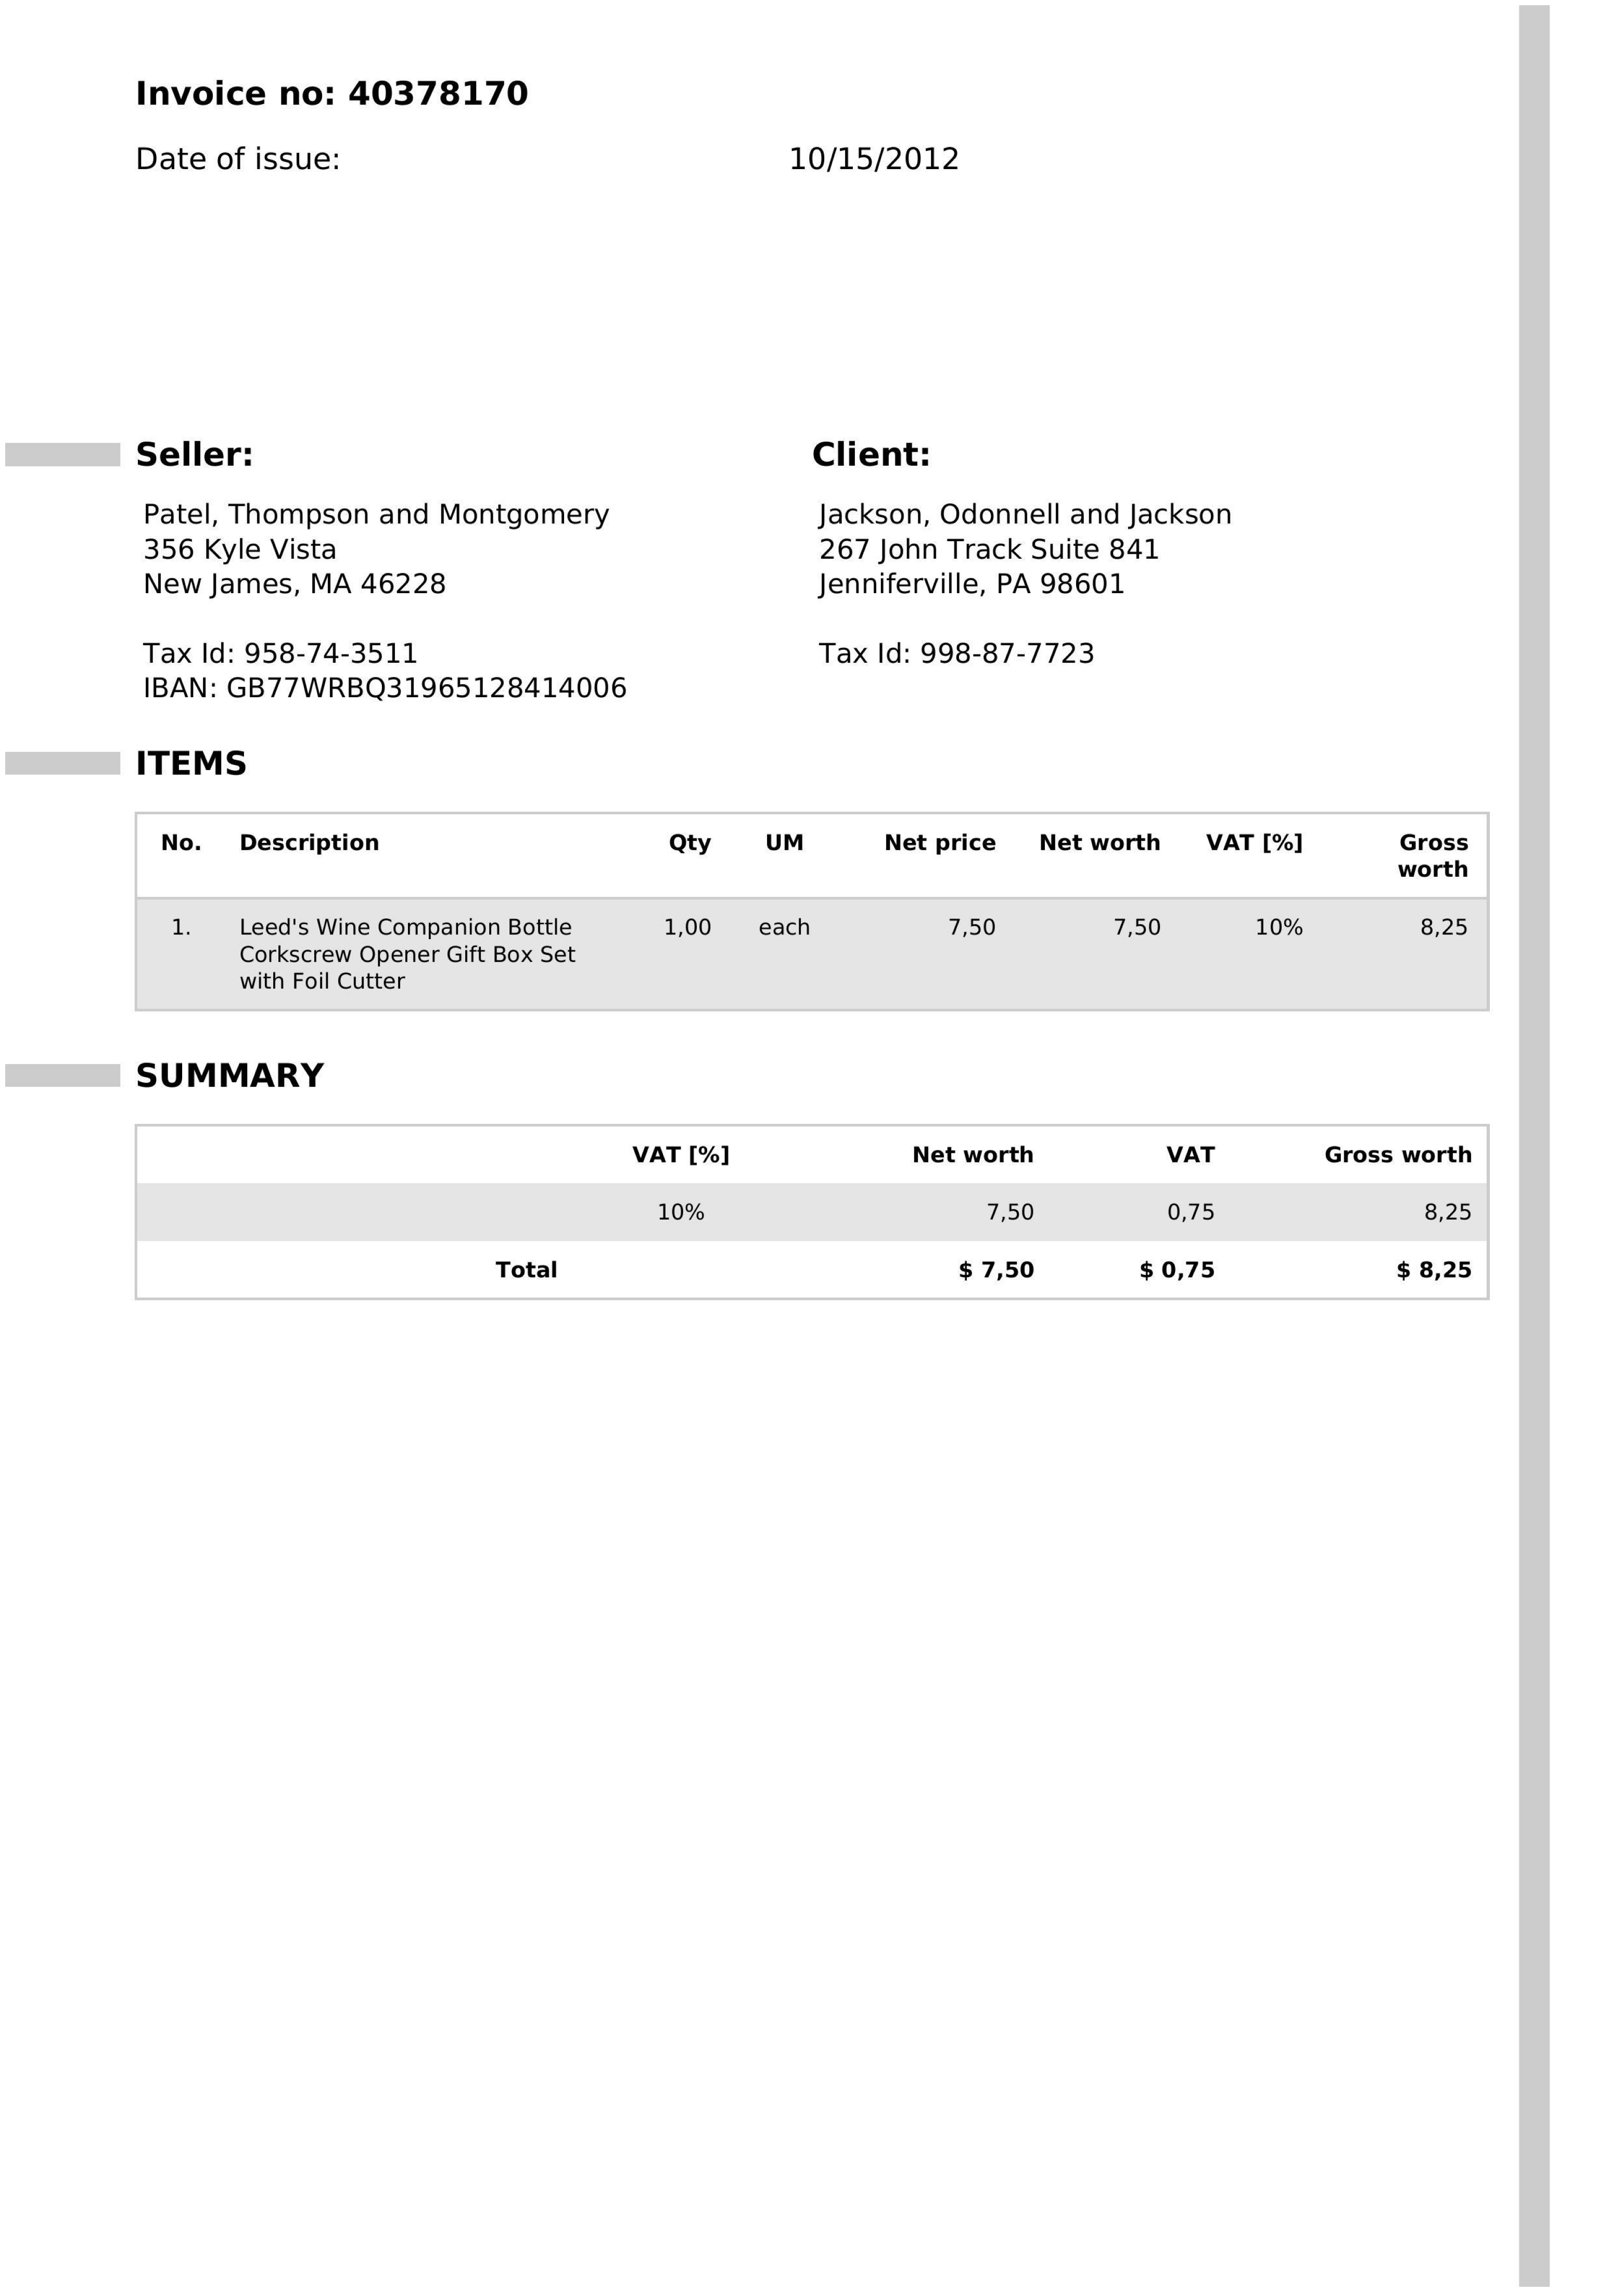

In [5]:
# Get an image from the dataset
sample_image = ds["train"][0]["image"]  # PIL Image object

# Display the image
display(sample_image)

In [11]:
import pytesseract

extracted_text = pytesseract.image_to_string(sample_image)

# Print the extracted text
print(extracted_text)

Invoice no: 40378170

Date of issue:

Seller:

Patel, Thompson and Montgomery
356 Kyle Vista
New James, MA 46228

Tax Id: 958-74-3511
IBAN: GB77WRBQ31965128414006

ITEMS
No. Description Qty
1. Leed's Wine Companion Bottle 1,00

Corkscrew Opener Gift Box Set
with Foil Cutter

SUMMARY

VAT [%]
10%

Total

10/15/2012

Client:

Jackson, Odonnell and Jackson
267 John Track Suite 841
Jenniferville, PA 98601

Tax Id: 998-87-7723

UM Net price Net worth VAT [%]
each 7,50 7,50 10%
Net worth VAT
7,50 0,75
$ 7,50 $ 0,75

Gross
worth

8,25

Gross worth
8,25

$ 8,25



In [12]:
#function for extracting date

import re
from datetime import datetime

def extract_date(ocr_text):
    # Define possible date patterns
    date_patterns = [
        r'\b(\d{1,2}/\d{1,2}/\d{4})\b',  # Matches MM/DD/YYYY or DD/MM/YYYY
        r'\b(\d{4}-\d{1,2}-\d{1,2})\b'   # Matches YYYY-MM-DD
    ]

    # Try matching different patterns
    for pattern in date_patterns:
        match = re.search(pattern, _text)
        if match:
            raw_date = match.group(1)  # Extracted date string

            # Convert date to standard format (YYYY-MM-DD)
            for fmt in ("%m/%d/%Y", "%d/%m/%Y", "%Y-%m-%d"):
                try:
                    formatted_date = datetime.strptime(raw_date, fmt).strftime("%Y-%m-%d")
                    return formatted_date
                except ValueError:
                    continue

    return None  # Return None if no date is found

In [14]:
extracted_date = extract_date(extracted_text)
print("Extracted_Date:", extracted_date)

Extracted_Date: 2012-10-15
